# Gaussian Process Regression

A linear regression model predicts the exact value of a test data point. From a Bayesian machine learning point of view, the prediction is not an exact value but comes from a probability distribution. GPR is a machine learning model which follows a nonparametric bayesian regression approach (nonparametric because we do not have coefficients like those of an equation to define the model).

GPR narrows down the probability distribution over all the possible target functions (prior) as we add new data to give a more accurate and evolved distribution over the target functions (posterior). Without any data, we would have no basis to form a model and the prior would look like:
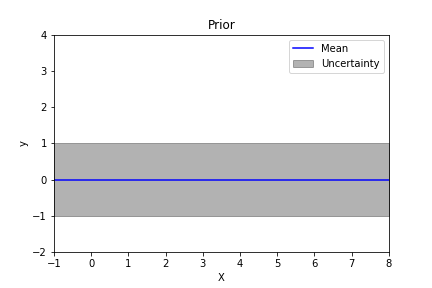

As seen above, a huge advantage of using GPR, a probabilistic approach to function approximation, is the availability of quantifiable uncertainty in the model. This would help us in determining how does the data deviate from its expected behaviour.

If we choose a 'Gaussian' prior and add 2 points to it, the posterior would look like:

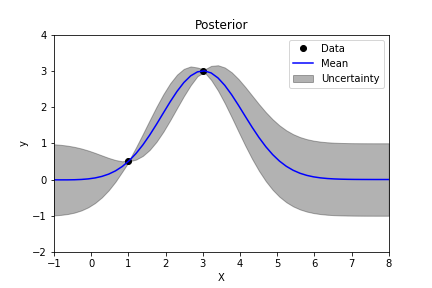

The prior in GPR is decided by the kernel (covariance function) we choose. Covariance, refers to the variability (or similarity) between two data points.

<font color="red">Siddhant
: Ideally covariance is defined between the values of random vectors, wherein each random vector is composed of random variables. A random variable over here can be considered to be a measurable real valued number coming from a probability distribution. We will be treating our data points as the outcome of a random variable.</font>

A covariance matrix (calculated from a covariance function) contains the actual numerical measure of variability between a data point and every other point in the data set. 


We basically assess how much (and in what manner) the output (y) varies with a small variation in the input (x) value. It relies on the presumption that points that are very close to each other will have similar y-values.

# Example of GPR 

Use of Gaussian Process Regression in function approximation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

Our goal is to fit to a function representing the results of the experiments done by Hoffman and Rehage _(Rheological properties of viscoelastic surfactant systems. The Journal of Physical Chemistry, 92(16):4712–4719, 1988.)_ to calculate the zero shear viscosity of a worm-like micelles solution.

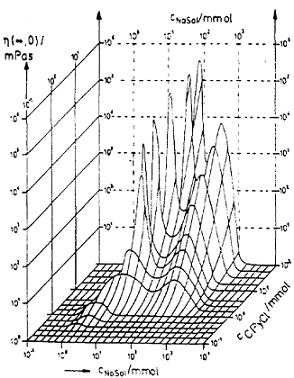

We will be using experimental data which was gathered through gaussian process regression based design of experiments to replicate the above plot.

In [2]:
df = pd.read_csv('logzsv.csv', index_col = 0)
df

,conc,zsv,log-conc,log-zsv
ExptNo.,,,,
1,1.80,1.343571,0.587787,0.295331
2,7.50,470.248800,2.014903,6.153262
3,31.60,4.892228,3.453157,1.587648
4,133.40,9.687286,4.893352,2.270814
5,562.30,1.586862,6.332036,0.461759
6,3.16,1.385140,1.150572,0.325801
7,5.21,4.537974,1.650580,1.512481
8,11.02,57.865808,2.399712,4.058127
9,18.17,8.042775,2.899772,2.084774


## GPR Model

<font color="red">Siddhant
: I have avoided going into the maths behind a GPR model as it involves some heavy linear algebra. But have presented an overview of how GPR works.</font>

GPR is based on the premise that the posterior is a joint gaussian probability distribution of the training output ($y$) and the test output ($y_*$). This distribution has a covariance arising from the covariance matrix constructed using the training data and the test data. 


Through some rigorous linear algebra, this joint probability distribution is converted to conditional probability distribtion ($p(y_*|x, y, x_*)$) to help us predict the test $y_*$ values given the training data ($x, y$) and test input ($x_*$). 


During training, we optimize the kernel parameters based on the covariance between just the training data points. 

The working of GPR for the test data would be a detour into linear algebra and might be too heavy right now. In short, for the predictions, we include the test data and calculate the covariance of the test data with test data, test data with training data, and the training data with training data, and through Cholesky Decomposition of these matrices, we get the final predictions!

From the above plot, we can see that the data follows a Gaussian trend, thus we would have to use a Gausian kernel. The most commonly used Gaussian kernel is the Radial Basis Function kernel (RBF).

We will be using a model called 'GaussianProcessRegressor' from the scikit-learn library. We also have to import the RBF kernel from scikit-learn.

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [4]:
GaussianProcessRegressor?

A key note here is to understand that an ML algorithm can have parameters and hyperparameters. Parameters are the actual coefficients of the model as seen in linear regression. Hyperparameters are more heuristic-like quantities defined by the user such as the choice of the kernel, or in neural networks it would be the number of atoms, number of layers and so forth.

An important hyperparameter in the GaussianProcessRegressor model is the kernel. Another useful hyperparameter is the alpha value. This allows us to restrict the model from overfitting to the noise. A higher value of alpha suggests a high noise in the data, thus the model will be more robust to overcome the noise.

Choosing the hyperparameters involve some insight and domain knowledge / requirements, and is upto the user.

We start with default parameters of the RBF kernel, and an alpha value of 1e-1.

In [5]:
RBF?

In [6]:
kernel = RBF()
gp = GaussianProcessRegressor(alpha = 1e-1, kernel = kernel)  

In [7]:
print('Default GPR model hyperparameters:', gp.get_params)

Default GPR model hyperparameters: <bound method BaseEstimator.get_params of GaussianProcessRegressor(alpha=0.1, copy_X_train=True,
             kernel=RBF(length_scale=1), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)>


We can see the initial parameters for the model above. Once we fit the model to the data through the .fit() method, the kernel parameters will be optimized. 

We need data in column form for scikit-learn. We will be using only the log values of concentration (mmol) and zero shear viscosity (mPa.s). We assign the log values in the pandas data frame to variables X and y.

In [8]:
X = np.array(df['log-conc'])
X = X[:, np.newaxis]                   # We need data in column form
y = np.array(df['log-zsv'])
y = y[:, np.newaxis]

In [9]:
gp = gp.fit(X, y)
print('Optimized kernel parameters:',gp.kernel_.get_params)

Optimized kernel parameters: <bound method Kernel.get_params of RBF(length_scale=1e-05)>


Let us try plotting the predictions from a new data set based on our model.

In [10]:
# Test data
x1 = np.linspace(-1, 8)
y1, y1std = gp.predict(x1[:, np.newaxis], return_std=True)

As mentioned earlier, GPR is based on the covariance between the data points. This covariance is stored as a covariance matrix and can be accessed through the argument return_cov = True and return_std = True for the covariance and the standard deviation respectively. We need the standard deviation to plot the uncertainty in the model.

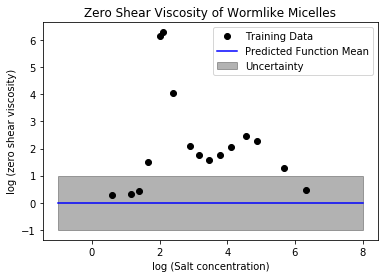

In [11]:
plt.plot(X, y, 'ko', label = 'Training Data')
plt.plot(x1, y1, 'b-', label = "Predicted Function Mean")
plt.title("Zero Shear Viscosity of Wormlike Micelles")
plt.xlabel('X')
plt.ylabel('y')

# Plotting the uncertainty
y1 = y1.flatten()
plt.fill_between(x1, y1 - y1std, y1 + y1std, alpha=0.3, color='k', label = "Uncertainty")

plt.xlabel("log (Salt concentration)")
plt.ylabel("log (zero shear viscosity)")
plt.legend()

This model does not work well. We need to work on the model hyperparameters. 

Let us look at the parameters of the RBF kernel. We have an argument called 'lengthscale' and length_scale_bounds.


Lengthscale is basically the length of the smallest wiggle in the function. It tells us, beyond what distance would two points not be correlated. Thus, we won’t be able to efficiently extrapolate beyond one lengthscale outside the data set. scikit-learn optimizes the lengthscale when we use .fit() within the length_scale_bounds. The default bounds of 1e-5 to 1e5 are too wide for our data set.

We can guide the optimization of the model by setting stricter bounds on the lengthscale. Let us go with 0.1 to 1.

In [12]:
kernel = RBF(length_scale_bounds = (0.1, 1.0))

gp = GaussianProcessRegressor(alpha = 0.1, kernel = kernel)  

gp = gp.fit(X, y)

print('Optimized kernel parameters:',gp.kernel_.get_params)

Optimized kernel parameters: <bound method Kernel.get_params of RBF(length_scale=0.348)>


In [13]:
# Test data
x1 = np.linspace(-1, 8)
y1, y1std = gp.predict(x1[:, np.newaxis], return_std=True)

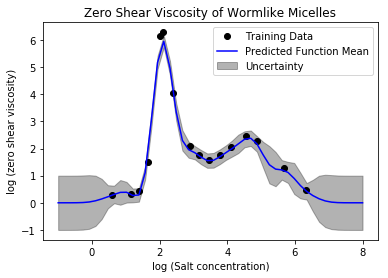

In [14]:
plt.plot(X, y, 'ko', label = 'Training Data')
plt.plot(x1, y1, 'b-', label = "Predicted Function Mean")
plt.title("Zero Shear Viscosity of Wormlike Micelles")
plt.xlabel('X')
plt.ylabel('y')

# Plotting the uncertainty
y1 = y1.flatten()
plt.fill_between(x1, y1 - y1std, y1 + y1std, alpha=0.3, color='k', label = "Uncertainty")

plt.xlabel("log (Salt concentration)")
plt.ylabel("log (zero shear viscosity)")
plt.legend()

As we can see now, this is a much better model. With the uncertainty regions along the function, we would know which areas would require more data and can target gathering data (in this case through experiments) only in the regions of high uncertainty. The final acceptable uncertainty in the model is upto the user to decide.

Over here we have chosen the bounds (0.1 to 1.0) based on some domain insight and hyperparameter optimization using log marginal likelihood. The actual mechanics behind LML might require a deeper dive into Bayesian approaches in ML.

<font color="red">Siddhant
: We use marginal likelihood as we are basically finding the likelihood of the data given the hyperparameters of the model, and not the actual parameters (as it a nonparametric model). Thus, we are marginalizing out the parameters and maximizing the likelihood directly with respect to the hyperparameters. The gp.log_marginal_likelihood() function in scikit-learn provides the values of the log marginal likelihood for the chosen hyperparameters of the kernel.</font>